In [1]:
from data_processing import gamry_eis as geis
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

In [2]:
geis = reload(geis)

In [ ]:
# Load data into objects
T10_file_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/B6T10V0_1_2_3_4_9_10_11_12_13_14_15_16/EIS/'
T15_file_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/B6T15V0_1_2_3_4_9_10_11_12_13_14_15_16/EIS/'

channels = [1,2,3,4,9,10,11,12,13,14,15,16]
cells = []
for channel in channels:
    cycle = 1
    eis_cycles = []
    while cycle <= 53:
        eis_sweep = geis.EisSweep(f'cycle{cycle}', 0.5)

        try:
            if cycle <= 23:
                file_prepath = T10_file_prepath
            if cycle > 23:
                file_prepath = T15_file_prepath
            if cycle < 10 and channel < 10:
                eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan00{channel}_Cycle00{cycle}_Step014.DTA')
            elif cycle < 10 and channel < 100:
                eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan0{channel}_Cycle00{cycle}_Step014.DTA')
            elif cycle < 100 and channel < 10:
                eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan00{channel}_Cycle0{cycle}_Step014.DTA')
            elif cycle < 100 and channel < 100:
                eis_sweep.read_DTA_file(file_prepath + f'B6T10V0_Chan0{channel}_Cycle0{cycle}_Step014.DTA')
            else:
                print('Cycle number greater than 100!')

            eis_cycles.append(geis.EisCycle(cycle, [eis_sweep], f'cycle_object_{cycle}'))
            cycle += 2

        except FileNotFoundError:
            cycle += 2
            print(f'Warning... File B6T10V0_Chan00{channel}_Cycle00{cycle}_Step014.DTA doesn\'t exist!')
        
        

    cells.append(geis.EisCell(f'channel{channel}', eis_cycles, channel_number=channel))
    eis_cycles = []

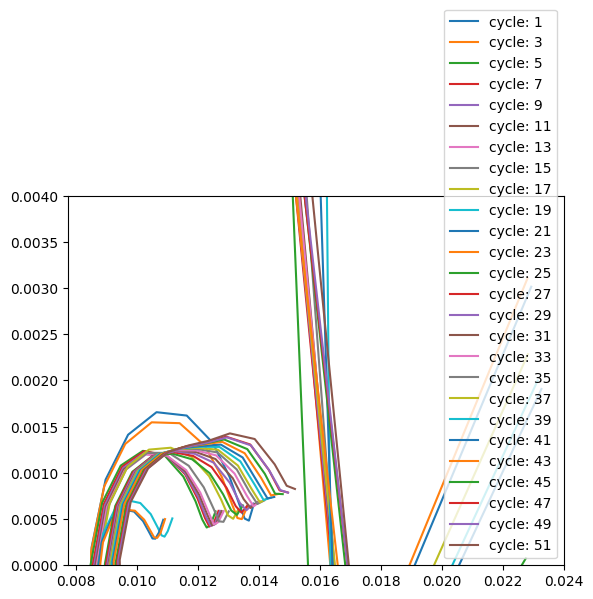

In [51]:
for cycle_number, cycle in enumerate(cells[0]):
    for sweep in cycle:
        plt.plot(sweep.z_real, -1*np.array(sweep.z_imag), label=f'cycle: {1+(cycle_number)*2}')
# plt.xlim([0, 0.016])
plt.ylim([0, 0.004])
plt.legend()
plt.show();

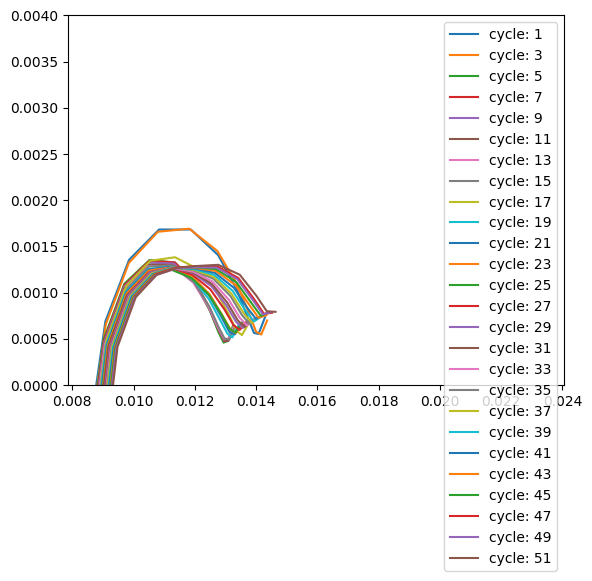

In [57]:
cell = [cell for cell in cells if cell.channel_number == 4]
for cycle_number, cycle in enumerate(cell[0]):
    for sweep in cycle:
        plt.plot(sweep.z_real, -1*np.array(sweep.z_imag), label=f'cycle: {1+(cycle_number)*2}')
# plt.xlim([0, 0.016])
plt.ylim([0, 0.004])
plt.legend()
plt.show();

In [1]:
from data_processing import arbin_lbt
from importlib import reload

In [14]:
arbin_lbt = reload(arbin_lbt)

In [15]:
data_prepath = 'C:/Users/seanb/OneDrive/Documents/PRIMED/export/batdat/MTC/raws/B6T10V0_1_2_3_4_9_10_11_12_13_14_15_16/'
folder_name = 'Channel_1/'


cell_builder = arbin_lbt.CellBuilder()
cell1 = arbin_lbt.ArbinCell(4, 4)
file_count = 1
while file_count < 9:
    file_name = f'B6T10V0_1_2_3_4_9_10_11_12_13_14_15_16_Channel_1.{file_count}.csv'
    cell_builder.read_B6_csv_data(cell1, data_prepath+file_name, {'characterization': [13,14]})
    file_count += 1

Column headers: ['Date_Time', 'Test_Time(s)', 'Step_Time(s)', 'Step_Index', 'Cycle_Index', 'Voltage(V)', 'Current(A)', 'Charge_Capacity(Ah)', 'Discharge_Capacity(Ah)', 'Charge_Energy(Wh)', 'Discharge_Energy(Wh)', 'ACR(Ohm)', 'Internal Resistance(Ohm)', 'dV/dt(V/s)', 'Battery_Temperature(C)']


In [ ]:
for cycle in cell1:
    print(f'Cycle: {cycle.cycle_index}')
    for step in cycle:
        print(f'Step Number: {step.step_index}')
        print(f'Step Temp: {step["Battery_Temperature(C)"]}')

In [21]:
step00 = cell1.cycles[0].steps[1].get_data_as_dataframe()
step00

,Date_Time,Test_Time(s),Step_Time(s),Step_Index,Cycle_Index,Voltage(V),Current(A),Charge_Capacity(Ah),Discharge_Capacity(Ah),Charge_Energy(Wh),Discharge_Energy(Wh),ACR(Ohm),Internal Resistance(Ohm),dV/dt(V/s),Battery_Temperature(C)
0,10/23/2021 07:20:56.000,61066.1699,40.6197,14,1,3.75953607,0,1.979080558,3.958078146,7.078522205,14.55306053,,0,1.04028E-05,18.71058508
